In [1]:
import torch
import torch.distributions as beta
from matplotlib import pyplot as plt

In [2]:
# set discrete steps
step = 100
discrtized_theta = torch.linspace(0,1,step)

## Task 1

Text(0, 0.5, 'prior')

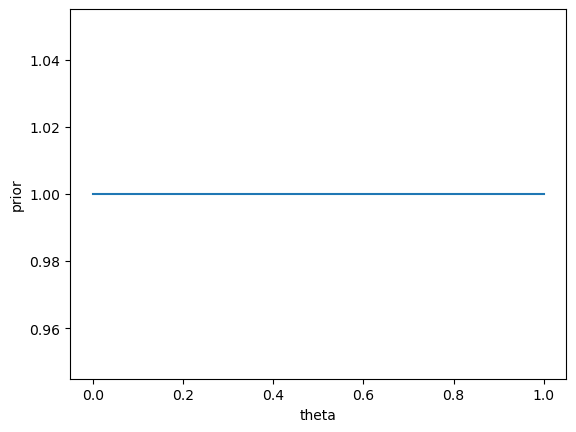

In [3]:
a0 = torch.tensor(1.0)
b0 = torch.tensor(1.0)
b_dist = beta.Beta(a0,b0)
prob = b_dist.log_prob(discrtized_theta).exp()
plt.plot(discrtized_theta,prob)
plt.xlabel("theta")
plt.ylabel("prior")

## Task 2

In [4]:
def a_b_update(x,N):
    updated_a = 1.0 + torch.tensor(x)
    updated_b = 1.0 + torch.tensor(N - x)
    
    return updated_a, updated_b

In [5]:
x = 1
N = 1
a1, b1 = a_b_update(x,N)

## Task 3

In [6]:
def _likelihood(x):
    return torch.tensor(discrtized_theta**x * (1-discrtized_theta)**(1-x))

/tmp/ipykernel_537074/1268195676.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(discrtized_theta**x * (1-discrtized_theta)**(1-x))


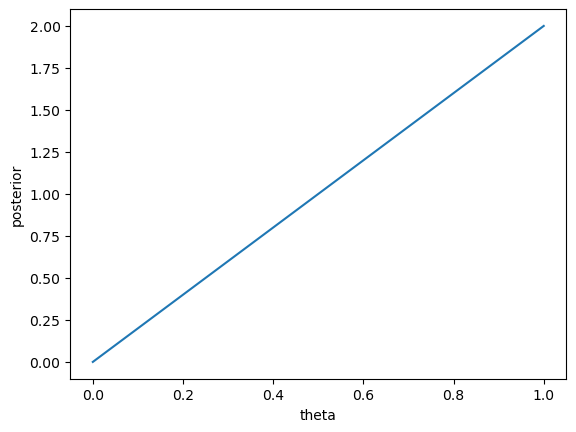

In [7]:
prior_dist = beta.Beta(1,1)
prior = prior_dist.log_prob(discrtized_theta).exp()
observation = 1
likelihood = _likelihood(observation)
posterior = prior*likelihood / torch.sum(prior*likelihood) / (1/step)
plt.plot(discrtized_theta,posterior)
plt.xlabel("theta")
plt.ylabel("posterior");

## Task 4

/tmp/ipykernel_537074/1268195676.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(discrtized_theta**x * (1-discrtized_theta)**(1-x))


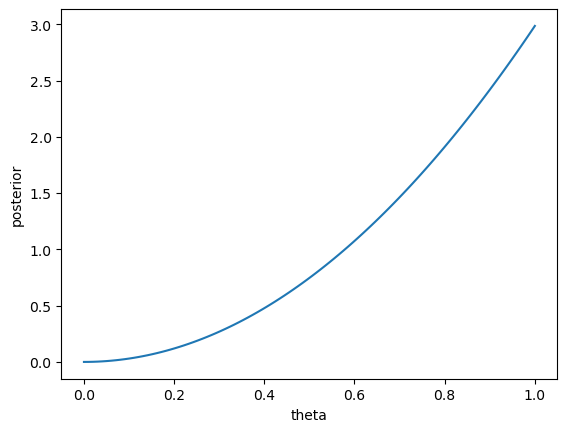

In [8]:
prior = posterior
observation = 1
likelihood = _likelihood(observation)
posterior = prior*likelihood / torch.sum(prior*likelihood) / (1/step) 
plt.plot(discrtized_theta,posterior)
plt.xlabel("theta")
plt.ylabel("posterior");

## Task 5

/tmp/ipykernel_537074/1268195676.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(discrtized_theta**x * (1-discrtized_theta)**(1-x))


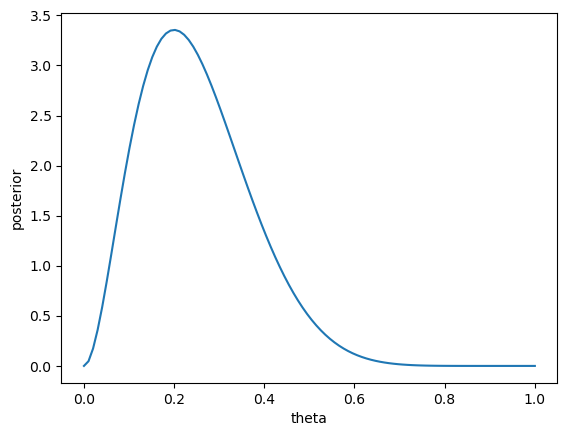

In [9]:
for observation in [0, 0, 0, 0, 0, 0, 0, 0]:
    prior = posterior
    likelihood = _likelihood(observation)
    posterior = prior*likelihood / torch.sum(prior*likelihood) / (1/step) 

plt.plot(discrtized_theta,posterior)
plt.xlabel("theta")
plt.ylabel("posterior");

## Task 6

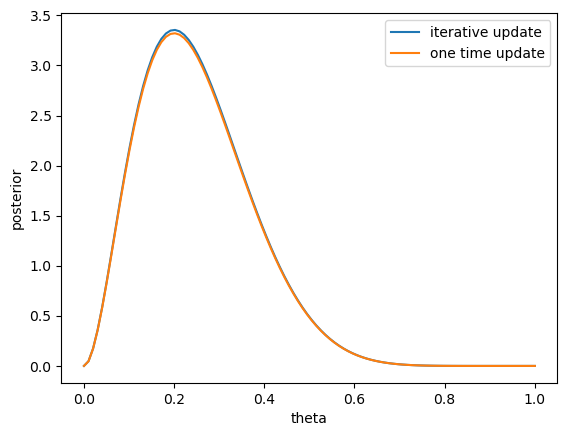

In [10]:
x = 2
N = 10
a10, b10 = a_b_update(x,N)

posterior_dist = beta.Beta(a10,b10)
_posterior = posterior_dist.log_prob(discrtized_theta).exp()
plt.plot(discrtized_theta,posterior,label="iterative update")
plt.plot(discrtized_theta,_posterior,label="one time update")
plt.xlabel("theta")
plt.ylabel("posterior")
plt.legend()